## Clustering of songs to notice similar songs' features

Based on the second notebook, I noticed an opportunity to perform clustering based on songs' audio features. This is conducted in this third notebook. The clusters are analysed and interpreted to see if they correspond to specific genre, if the clusters are all about the same size or not, and if some of my favourite songs, gathered from one of my personal playlists and the On Repeat Spotify playlist, tend to fall in one specific cluster, or not.

In [1]:
import pandas as pd
import time 
import numpy as np
import os, pickle
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

In [2]:
with open('../spotify_df_test.pkl', 'rb') as i:
    df = pickle.load(i)

pd.reset_option('all')

/var/folders/2r/rd334g7d7gnfkfqkdqsn1x540000gn/T/ipykernel_90526/1790732980.py:4: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/var/folders/2r/rd334g7d7gnfkfqkdqsn1x540000gn/T/ipykernel_90526/1790732980.py:4: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [3]:
df = df.sort_values(by='artist', )
df

,name,album,artist,length,release_year,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,uri
3408,GOSHA,- TRAGEDY +,$NOT,120000,2020,70,0.814889,0.861648,0.450704,0.000014,0.332992,0.711565,0.441145,0.344982,0.496439,0.8,0.000000,1.0,spotify:track:0j8ppsOOawdPCJnSTcXgOy
1981,It's Gonna Be Me,No Strings Attached,*NSYNC,191040,2000,58,0.046177,0.655137,0.879276,0.000002,0.059836,0.849641,0.084942,0.712135,0.897253,0.8,0.000000,0.0,spotify:track:35zGjsxI020C2NPKp2fzS7
1982,Bye Bye Bye,No Strings Attached,*NSYNC,200560,2000,63,0.041046,0.624619,0.933602,0.001069,0.086578,0.846109,0.054719,0.744772,0.894201,0.8,0.727273,0.0,spotify:track:4r8lRYnoOGdEi6YyI5OC1o
1263,Substance,The Wolf of Grape Street,03 Greedo,219834,2018,71,0.261569,0.609359,0.321932,0.000000,0.108607,0.621365,0.083457,0.306258,0.200407,0.8,0.272727,0.0,spotify:track:0MoQI1EZGSHLhd5UBdxPol
1086,Web,You Can’t Kill Me,070 Shake,126151,2022,42,0.560362,0.357070,0.459759,0.000000,0.171107,0.779266,0.036585,0.449708,0.166836,0.8,0.181818,1.0,spotify:track:5AwYKIFP390CdH7XAS4k8z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,Feelin' Myself,#willpower,will.i.am,253546,2013,61,0.029477,0.873856,0.536217,0.000000,0.141393,0.750662,0.165429,0.416061,0.522889,0.8,0.545455,0.0,spotify:track:26XUAwGZqQEyy8Ubhtj4kq
3307,Ghetto Ghetto,#willpower,will.i.am,232666,2013,18,0.195171,0.740590,0.808853,0.000000,0.100820,0.828831,0.348887,0.733479,0.353001,0.8,0.272727,1.0,spotify:track:5KRC8zt9tmE8lXj9rK56TP
2855,I Got It From My Mama,Songs About Girls,will.i.am,241520,2007,49,0.096680,0.903357,0.781690,0.000032,0.052664,0.809383,0.053552,0.513312,0.891150,0.8,0.545455,1.0,spotify:track:1z7FW0nlEBGtQWQ19kz7qp
728,WLR!,WLR!,yan*,137967,2022,0,0.085614,0.810783,0.492958,0.000000,0.112705,0.624417,0.258749,0.574841,0.173957,0.8,0.636364,1.0,spotify:track:19UzbUSgu5kG8vsFOdu4pG


In [4]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 
            'time_signature']

columns = ['name', 'artist', 'acousticness', 'danceability', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 
            'time_signature']

X = df.copy()

X = X[columns]
X

,name,artist,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
3408,GOSHA,$NOT,0.814889,0.861648,0.450704,0.000014,0.332992,0.711565,0.441145,0.344982,0.496439,0.8
1981,It's Gonna Be Me,*NSYNC,0.046177,0.655137,0.879276,0.000002,0.059836,0.849641,0.084942,0.712135,0.897253,0.8
1982,Bye Bye Bye,*NSYNC,0.041046,0.624619,0.933602,0.001069,0.086578,0.846109,0.054719,0.744772,0.894201,0.8
1263,Substance,03 Greedo,0.261569,0.609359,0.321932,0.000000,0.108607,0.621365,0.083457,0.306258,0.200407,0.8
1086,Web,070 Shake,0.560362,0.357070,0.459759,0.000000,0.171107,0.779266,0.036585,0.449708,0.166836,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
5266,Feelin' Myself,will.i.am,0.029477,0.873856,0.536217,0.000000,0.141393,0.750662,0.165429,0.416061,0.522889,0.8
3307,Ghetto Ghetto,will.i.am,0.195171,0.740590,0.808853,0.000000,0.100820,0.828831,0.348887,0.733479,0.353001,0.8
2855,I Got It From My Mama,will.i.am,0.096680,0.903357,0.781690,0.000032,0.052664,0.809383,0.053552,0.513312,0.891150,0.8
728,WLR!,yan*,0.085614,0.810783,0.492958,0.000000,0.112705,0.624417,0.258749,0.574841,0.173957,0.8


In [5]:
df.isnull().sum() 

name                0
album               0
artist              0
length              0
release_year        0
popularity          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
time_signature      0
key                 0
mode                0
uri                 0
dtype: int64

In [6]:
X.loc[:, 'song'] = X['name'] + ' - ' + X['artist']
X = X.drop(columns=['name', 'artist'])
X = X.set_index('song')

In [7]:
X

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
song,,,,,,,,,,
GOSHA - $NOT,0.814889,0.861648,0.450704,0.000014,0.332992,0.711565,0.441145,0.344982,0.496439,0.8
It's Gonna Be Me - *NSYNC,0.046177,0.655137,0.879276,0.000002,0.059836,0.849641,0.084942,0.712135,0.897253,0.8
Bye Bye Bye - *NSYNC,0.041046,0.624619,0.933602,0.001069,0.086578,0.846109,0.054719,0.744772,0.894201,0.8
Substance - 03 Greedo,0.261569,0.609359,0.321932,0.000000,0.108607,0.621365,0.083457,0.306258,0.200407,0.8
Web - 070 Shake,0.560362,0.357070,0.459759,0.000000,0.171107,0.779266,0.036585,0.449708,0.166836,0.8
...,...,...,...,...,...,...,...,...,...,...
Feelin' Myself - will.i.am,0.029477,0.873856,0.536217,0.000000,0.141393,0.750662,0.165429,0.416061,0.522889,0.8
Ghetto Ghetto - will.i.am,0.195171,0.740590,0.808853,0.000000,0.100820,0.828831,0.348887,0.733479,0.353001,0.8
I Got It From My Mama - will.i.am,0.096680,0.903357,0.781690,0.000032,0.052664,0.809383,0.053552,0.513312,0.891150,0.8


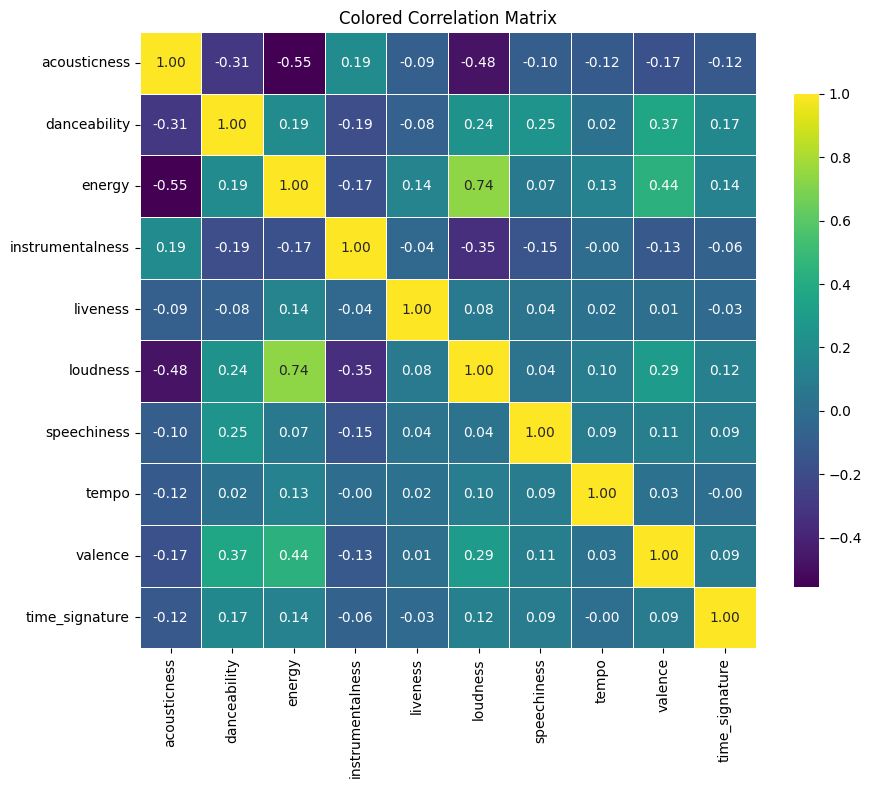

In [8]:
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', square=True, cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Colored Correlation Matrix')
plt.show()

As it can be seen at the correlation matrix above, energy has a considerable a negative correlation to acousticness, and acousticness, a negative correlation to loudness. However, energy has a highly positive correlation to loudness and valence.

## K-Means Clustering

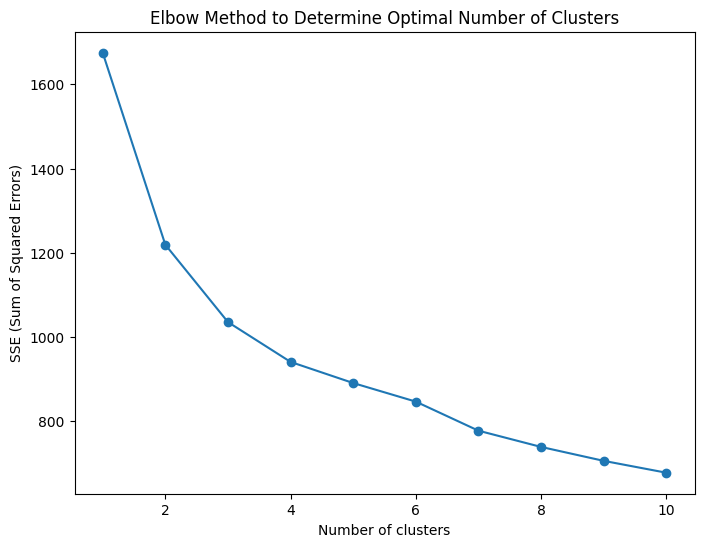

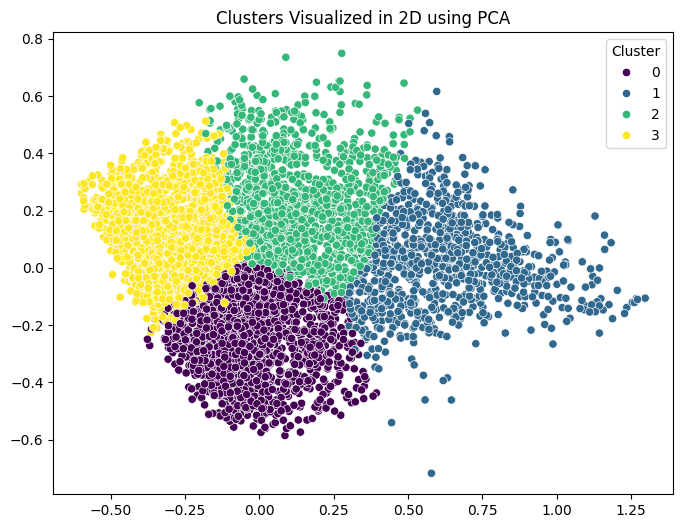

In [56]:
#K-means clustering

# Use the elbow method to determine the number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X[features])
    sse.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

# Fit the model
kmeans = KMeans(n_clusters=4, random_state=42)  # You can change n_clusters based on the elbow method
X['Cluster'] = kmeans.fit_predict(X[features])

# Visualise clusters using PCA (reduces dimensions to 2D for visualization)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X[features])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=X['Cluster'], palette='viridis')
plt.title('Clusters Visualized in 2D using PCA')
plt.show()


In [50]:
target = np.array([0.6, -0.2])

index = np.where((pca_features == target).all(axis=1))[0]

closest = np.linalg.norm(pca_features - target, axis=1).argmin()

closest

X.index[int(closest)]

'Heaven - Khalid'

In [21]:
X[features]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature
song,,,,,,,,,,
GOSHA - $NOT,0.814889,0.861648,0.450704,0.000014,0.332992,0.711565,0.441145,0.344982,0.496439,0.8
It's Gonna Be Me - *NSYNC,0.046177,0.655137,0.879276,0.000002,0.059836,0.849641,0.084942,0.712135,0.897253,0.8
Bye Bye Bye - *NSYNC,0.041046,0.624619,0.933602,0.001069,0.086578,0.846109,0.054719,0.744772,0.894201,0.8
Substance - 03 Greedo,0.261569,0.609359,0.321932,0.000000,0.108607,0.621365,0.083457,0.306258,0.200407,0.8
Web - 070 Shake,0.560362,0.357070,0.459759,0.000000,0.171107,0.779266,0.036585,0.449708,0.166836,0.8
...,...,...,...,...,...,...,...,...,...,...
Feelin' Myself - will.i.am,0.029477,0.873856,0.536217,0.000000,0.141393,0.750662,0.165429,0.416061,0.522889,0.8
Ghetto Ghetto - will.i.am,0.195171,0.740590,0.808853,0.000000,0.100820,0.828831,0.348887,0.733479,0.353001,0.8
I Got It From My Mama - will.i.am,0.096680,0.903357,0.781690,0.000032,0.052664,0.809383,0.053552,0.513312,0.891150,0.8


The clusters are visualised using a 2D scatter plot after applying Principal Component Analysis (PCA) to reduce the dimensionality of your data. 
The two components representing each axis, give a 2D representation of the data that captures as much of the data's variability as possible.

## Analysis and Interpretation

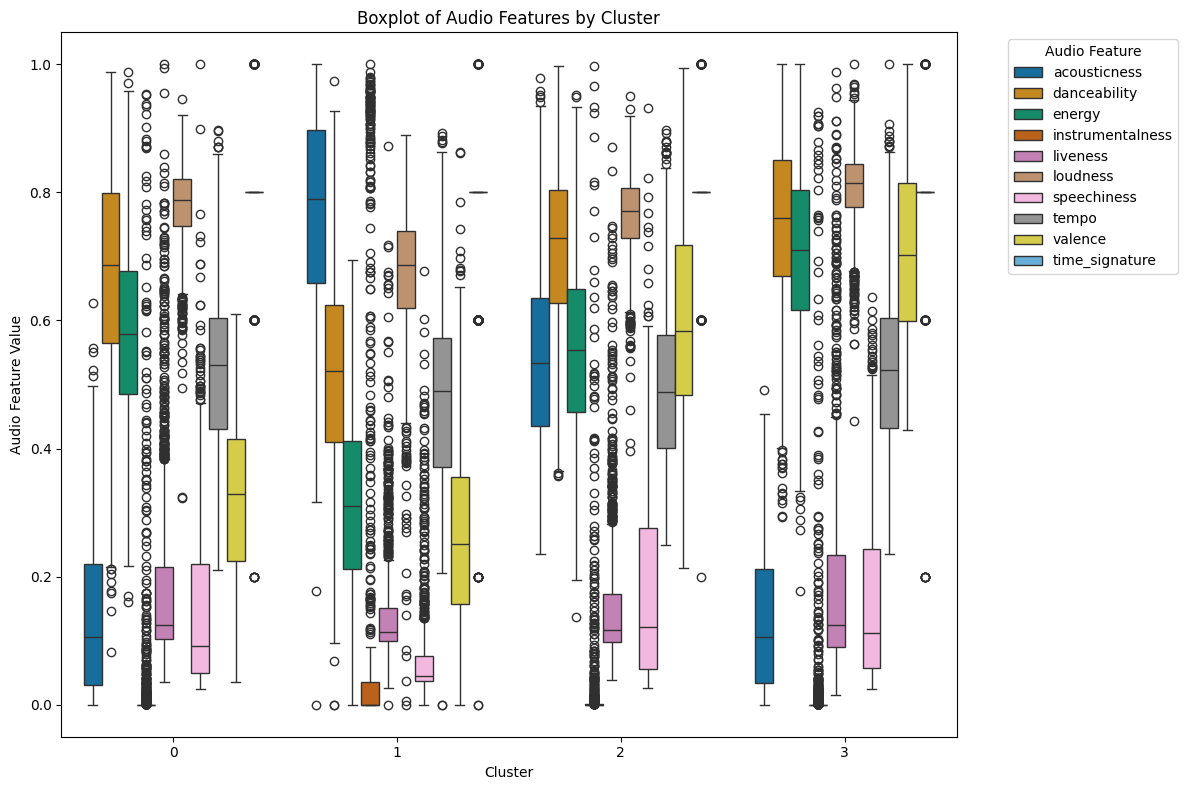

In [10]:
melted_X = X.melt(id_vars='Cluster', value_vars=features, 
                   var_name='Feature', value_name='Value')

plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_X, x='Cluster', y='Value', hue='Feature', palette='colorblind')

plt.title('Boxplot of Audio Features by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Audio Feature Value')
plt.legend(title='Audio Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [11]:
stats_summary = X.groupby('Cluster').agg({
    'acousticness': ['median', 'mean', 'std', 'min', 'max', 
                     lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'danceability': ['median', 'mean', 'std', 'min', 'max', 
                     lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'energy': ['median', 'mean', 'std', 'min', 'max', 
               lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'instrumentalness': ['median', 'mean', 'std', 'min', 'max', 
                         lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'liveness': ['median', 'mean', 'std', 'min', 'max', 
                 lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'loudness': ['median', 'mean', 'std', 'min', 'max', 
                 lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'speechiness': ['median', 'mean', 'std', 'min', 'max', 
                    lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'tempo': ['median', 'mean', 'std', 'min', 'max', 
              lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'valence': ['median', 'mean', 'std', 'min', 'max', 
                lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
}).reset_index()

In [12]:
#print all rows and columns of stats_summary

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

stats_summary

Cluster acousticness                                                     \
                median      mean       std       min       max <lambda_0>   
0       0     0.105634  0.137047  0.122594  0.000061  0.627767   0.030080   
1       1     0.789738  0.768002  0.161264  0.000000  1.000000   0.658451   
2       2     0.533199  0.543795  0.142650  0.235412  0.978873   0.434608   
3       3     0.105634  0.129997  0.109316  0.000026  0.490946   0.034356   

             danceability                                                     \
  <lambda_1>       median      mean       std       min       max <lambda_0>   
0   0.220322     0.686673  0.673875  0.162889  0.082096  0.987792   0.564598   
1   0.897887     0.520855  0.516408  0.154477  0.000000  0.973550   0.410987   
2   0.635312     0.728383  0.714966  0.123284  0.357070  0.997965   0.627670   
3   0.212274     0.759919  0.750668  0.129915  0.292981  1.000000   0.669379   

                energy                                                     \
  <lambda_1>    median      mean       std       min       max <lambda_0>   
0   0.798576  0.579477  0.581984  0.138220  0.160966  0.987928   0.485915   
1   0.624619  0.309859  0.312876  0.138680  0.000000  0.694165   0.211268   
2   0.803662  0.554326  0.555931  0.137270  0.136821  0.951710   0.456740   
3   0.849949  0.710262  0.704681  0.133795  0.177062  1.000000   0.615694   

             instrumentalness                                                \
  <lambda_1>           median      mean       std  min       max <lambda_0>   
0   0.677062         0.000002  0.024614  0.112766  0.0  0.953751        0.0   
1   0.411972         0.000173  0.137115  0.293498  0.0  1.000000        0.0   
2   0.649396         0.000004  0.025691  0.107927  0.0  0.997945        0.0   
3   0.804326         0.000000  0.020195  0.105119  0.0  0.926002        0.0   

              liveness                                                     \
  <lambda_1>    median      mean       std       min       max <lambda_0>   
0   0.000223  0.123975  0.183376  0.138948  0.035246  1.000000   0.102459   
1   0.035971  0.113730  0.152899  0.104417  0.000000  0.872951   0.100000   
2   0.000434  0.116803  0.158951  0.114250  0.038627  0.870902   0.098105   
3   0.000194  0.123975  0.183490  0.148957  0.015676  0.988730   0.089754   

              loudness                                                     \
  <lambda_1>    median      mean       std       min       max <lambda_0>   
0   0.215164  0.787489  0.781000  0.059307  0.323521  0.946273   0.747787   
1   0.151639  0.687249  0.665292  0.115870  0.000000  0.890201   0.619183   
2   0.172643  0.771724  0.764690  0.065083  0.396771  0.950233   0.728755   
3   0.234119  0.814706  0.808795  0.055770  0.443108  1.000000   0.777450   

             speechiness                                                     \
  <lambda_1>      median      mean       std       min       max <lambda_0>   
0   0.821037    0.091941  0.146963  0.128913  0.023966  1.000000   0.049205   
1   0.739551    0.045599  0.079836  0.089878  0.000000  0.677625   0.036320   
2   0.807378    0.121951  0.177955  0.147821  0.025769  0.932131   0.055726   
3   0.844772    0.111347  0.159227  0.123978  0.024496  0.636267   0.057370   

                 tempo                                                     \
  <lambda_1>    median      mean       std       min       max <lambda_0>   
0   0.219512  0.530420  0.523581  0.117903  0.210151  0.897155   0.430948   
1   0.075716  0.490010  0.489434  0.134568  0.000000  0.893001   0.371825   
2   0.275716  0.487650  0.498094  0.122601  0.249405  0.897004   0.401343   
3   0.243902  0.522681  0.529917  0.122322  0.235459  1.000000   0.431459   

               valence                                                     \
  <lambda_1>    median      mean       std       min       max <lambda_0>   
0   0.603958  0.328586  0.316041  0.125578  0.035809  0.610376   0.223805   
1   0.573293  0.250254  0

In [13]:
pd.reset_option('all')

X[X['Cluster'] == 3]

/var/folders/2r/rd334g7d7gnfkfqkdqsn1x540000gn/T/ipykernel_90526/1247771560.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/var/folders/2r/rd334g7d7gnfkfqkdqsn1x540000gn/T/ipykernel_90526/1247771560.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,Cluster
song,,,,,,,,,,,
It's Gonna Be Me - *NSYNC,0.046177,0.655137,0.879276,0.000002,0.059836,0.849641,0.084942,0.712135,0.897253,0.8,3
Bye Bye Bye - *NSYNC,0.041046,0.624619,0.933602,0.001069,0.086578,0.846109,0.054719,0.744772,0.894201,0.8,3
Flip Flop - 10k.Caash,0.044668,0.766022,0.553320,0.000000,0.117828,0.810998,0.179215,0.561335,0.538149,0.8,3
Balayer - 13 Block,0.113682,0.889115,0.663984,0.000050,0.098258,0.778408,0.155885,0.414224,0.767040,0.8,3
EU JÁ SOFRI POR AMOR MAS NÃO SOFRO MAIS - 130 BPM,0.141851,0.584944,0.762575,0.000000,0.096107,0.905915,0.297985,0.356137,0.825025,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...
Choppa - ohtrapstar,0.002716,0.871821,0.695171,0.007009,0.236680,0.739564,0.288441,0.358190,0.652085,0.8,3
pg baby - redveil,0.040342,0.330621,0.804829,0.000000,0.145492,0.747408,0.515376,0.347798,0.900305,0.8,3
i tried - slowthai,0.082495,0.435402,0.776660,0.000000,0.375000,0.761559,0.430541,0.592044,0.620549,0.8,3


In [14]:
X['Cluster'].value_counts()

Cluster
0    1981
3    1931
2    1223
1     847
Name: count, dtype: int64

Cluster 0: high acousticness, mid danceability, low energy, highest instrumentalness, mid-high loudness, low speechiness, mid tempo and low valence. This corresponds to more to minimalist, introspective, often relaxing, nostalgic or sad music like indie, folk, alt-R&B, jazz or blues. Featuring artists include Sampha, alt-J, Oh Wonder, Sabrina Claudio, Mereba and Daniel Caesar.


Cluster 1: mid-high acousticness, high danceability, mid energy, low instrumentalness, high loudness, highest speeechiness, mid-low tempo and mid valence. This corresponds to rythmic, colourful music that you can't help slowly booping your head to like jazzy samba, lyrical alt-rap, soul, and slow afrofusion. Featuring artists include Jorge Ben Jor, Little Simz, Cleo Soul, Faveur Mukoko or Aretha Franklin.

Cluster 2: low acousticness, high danceability, high energy, low instrulmentalness, highest liveness, low speechiness, mid tempo and high valence. This correspinds to upbeat, generally positive music like afrobeats, pop, EDM, upbeat rap, rock or brazilian funk. Featuring artists include Inner City, Tiakola, Wizkid, Declan mcKenna and Still Woozy.

Cluster 3: This cluster is similar to cluster 2, but with lower energy, and low valence. This corresponds to modern rap, indie-pop. Featuring artists include Twenty One Pilots, Tyler the Creator, Young Thug, Drake, Coldplay, Hozier, Pixies and Rihanna.

Next steps:The visualised clusters are all very close to each other,  especially clusters 2 and 3. Maybe other clustering techiniques would help to distinguish them more like density-based clustering using DBSCAN or hierarchical clustering.